### About Data

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil.
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

Task: Analyze the performance of the marketplace and offer opportunities for growth

In [2]:
!pip install pyforest

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15927 sha256=fc75e8090056b71dc4406d7740454841ba44398b240e0841eddebfde140b6984
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\50\94\94\c8224da834a4db55f67c86feb7c742111ff051d5f3e17127d8
Successfully built pyforest


In [110]:
import pyforest

import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

In [111]:
customers  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_customers_dataset.csv')

<IPython.core.display.Javascript object>

In [112]:
geolocation  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_geolocation_dataset.csv')

<IPython.core.display.Javascript object>

In [113]:
items  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_order_items_dataset.csv')

<IPython.core.display.Javascript object>

In [114]:
payments  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_order_payments_dataset.csv')

<IPython.core.display.Javascript object>

In [115]:
reviews  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_order_reviews_dataset.csv')

<IPython.core.display.Javascript object>

In [116]:
orders  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_orders_dataset.csv')

<IPython.core.display.Javascript object>

In [117]:
products  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_products_dataset.csv')

<IPython.core.display.Javascript object>

In [118]:
sellers  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/olist_sellers_dataset.csv')

<IPython.core.display.Javascript object>

In [119]:
category_name  = pd.read_csv('C:/Users/Admin/Desktop/ANALYSE/data_science/datasets/olist/product_category_name_translation.csv')

<IPython.core.display.Javascript object>

### Exploratory data analysis

In [120]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [121]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [122]:
# chаnge data types and create new columns
items['year_month'] = pd.to_datetime(items['shipping_limit_date']).dt.to_period('M')
orders['year_month'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.to_period('M')
orders['order_approved_at']= pd.to_datetime(orders['order_approved_at'])
orders['order_purchase_timestamp']= pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date']= pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_purchase_timestamp']= pd.to_datetime(orders['order_purchase_timestamp'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
 8   year_month                     99441 non-null  period[M]     
dtypes: datetime64[ns](3), object(5), period[M](1)
memory usage: 6.8+ MB


In [124]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02


Calculation quantity of orders by status

In [125]:
orders_status = orders['order_status'].value_counts().to_frame().reset_index().\
               rename(columns={'index' : 'order_status','order_status':'quantity'})

In [126]:
orders_status['status_rate_%'] = round((orders_status['quantity']/orders_status['quantity'].sum())*100,2)
orders_status

,order_status,quantity,status_rate_%
0,delivered,96478,97.02
1,shipped,1107,1.11
2,canceled,625,0.63
3,unavailable,609,0.61
4,invoiced,314,0.32
5,processing,301,0.30
6,created,5,0.01
7,approved,2,0.00


97% of our orders was delivered. We have reliable logistic provider. This information can be useful for attracting new sellers.

In [127]:
# Create new columns for next analysis
items['payment_value']= items['price']+items['freight_value']
orders['hours_to_approve'] = round((orders['order_approved_at'] - orders['order_purchase_timestamp']).dt.total_seconds() / 3600,2)
orders['days_to_deliver'] = round((orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / (24 * 3600),0)

In [128]:
# Filtr data by status and date. Create new table by merging orders, items, customers and reviews

orders = orders[(orders['order_status']=='delivered') & (orders['year_month']>='2017-01')]\
[['year_month','order_purchase_timestamp','order_id','customer_id','hours_to_approve','days_to_deliver']]
reviews = reviews[['order_id','review_id','review_score']]
items = items[['year_month','order_id','product_id','seller_id','payment_value','price','freight_value']]
orders = customers[['customer_id','customer_unique_id','customer_state']].merge(orders, how = 'inner', on='customer_id')
orders = orders.merge( reviews, how = 'left', on='order_id')
df = items.merge(orders, on=['year_month', 'order_id'], how='inner')

In [129]:
df.head()

,year_month,order_id,product_id,seller_id,payment_value,price,freight_value,customer_id,customer_unique_id,customer_state,order_purchase_timestamp,hours_to_approve,days_to_deliver,review_id,review_score
0,2017-09,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,72.19,58.90,13.29,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,2017-09-13 08:59:02,0.78,8.0,97ca439bc427b48bc1cd7177abe71365,5.0
1,2018-01,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,216.87,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,2018-01-14 14:33:31,0.25,8.0,0c5b33dea94867d1ac402749e5438e8b,5.0
2,2018-08,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,25.78,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,2018-08-08 10:00:35,0.16,6.0,f4028d019cb58564807486a6aaf33817,4.0
3,2017-02,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,218.04,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,2017-02-04 13:57:51,0.21,25.0,940144190dcba6351888cafa43f3a3a5,5.0
4,2017-05,00048cc3ae777c65dbb7d2a0634bc1ea,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,34.59,21.90,12.69,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,MG,2017-05-15 21:42:34,30.21,7.0,5e4e50af3b7960b7a10d86ec869509e8,4.0


In [130]:
df.shape

(87797, 15)

In [131]:
nan_count = df['review_score'].isna().sum()
print(f"Number of NaN values in 'review_score' column: {nan_count}")

Number of NaN values in 'review_score' column: 660


In [132]:
df['review_score'] = df['review_score'].fillna(0)

In [133]:
df_group = df.groupby('year_month').agg(
    total_payments=('payment_value', 'sum'),
    mean_freight_value=('freight_value', 'mean'),
    quantity_sellers=('seller_id', pd.Series.nunique),
    quantity_customers=('customer_unique_id', pd.Series.nunique),
    mean_days_to_deliver=('days_to_deliver', 'mean'),
   mean_hours_to_approve=('hours_to_approve', 'mean'),
    mean_review_score=('review_score','mean')
).reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
df_group['mean_freight_value']=df_group['mean_freight_value'].round(2)
df_group['mean_days_to_deliver']= df_group['mean_days_to_deliver'].round(0)
df_group['mean_review_score'] = df_group['mean_review_score'].round(2)
df_group['mean_hours_to_approve'] = df_group['mean_hours_to_approve'].round(2)

In [135]:
df_group.head()

,year_month,total_payments,mean_freight_value,quantity_sellers,quantity_customers,mean_days_to_deliver,mean_hours_to_approve,mean_review_score
0,2017-01,86247.96,17.32,170,523,13.0,12.42,4.10
1,2017-02,228680.97,20.03,368,1361,13.0,8.62,4.19
2,2017-03,334864.34,19.09,422,2002,13.0,3.89,4.11
3,2017-04,256909.33,18.79,413,1500,14.0,8.31,4.06
4,2017-05,434737.50,19.00,510,2731,11.0,10.05,4.15


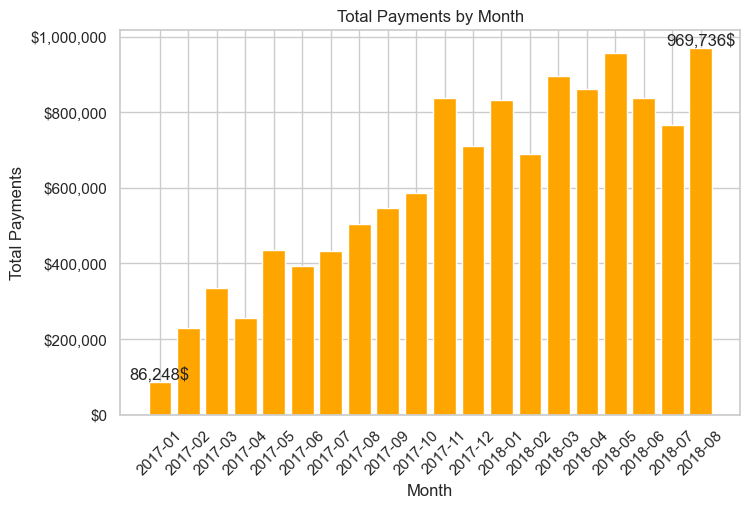

In [136]:
def format_ticks_dollars(x, pos):
    return '${:,.0f}'.format(x)
df_group['year_month'] = df_group['year_month'].astype(str)

plt.figure(figsize=(8, 5))
bars = plt.bar(df_group['year_month'], df_group['total_payments'], color='orange')

formatter = ticker.FuncFormatter(format_ticks_dollars)
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Month')
plt.ylabel('Total Payments')
plt.title('Total Payments by Month')


plt.xticks(rotation=45)


plt.text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height(),
         '{:,.0f}$'.format(df_group['total_payments'].iloc[0]),
         ha='center', va='bottom')
plt.text(bars[-1].get_x() + bars[-1].get_width() / 2, bars[-1].get_height(),
         '{:,.0f}$'.format(df_group['total_payments'].iloc[-1]),
         ha='center', va='bottom')

plt.grid(True)
plt.show()


Based on this graph, we see that in 18 months we have grown more than 10 times. At this stage, we don’t know how profitable our business is, because we don’t have information about costs

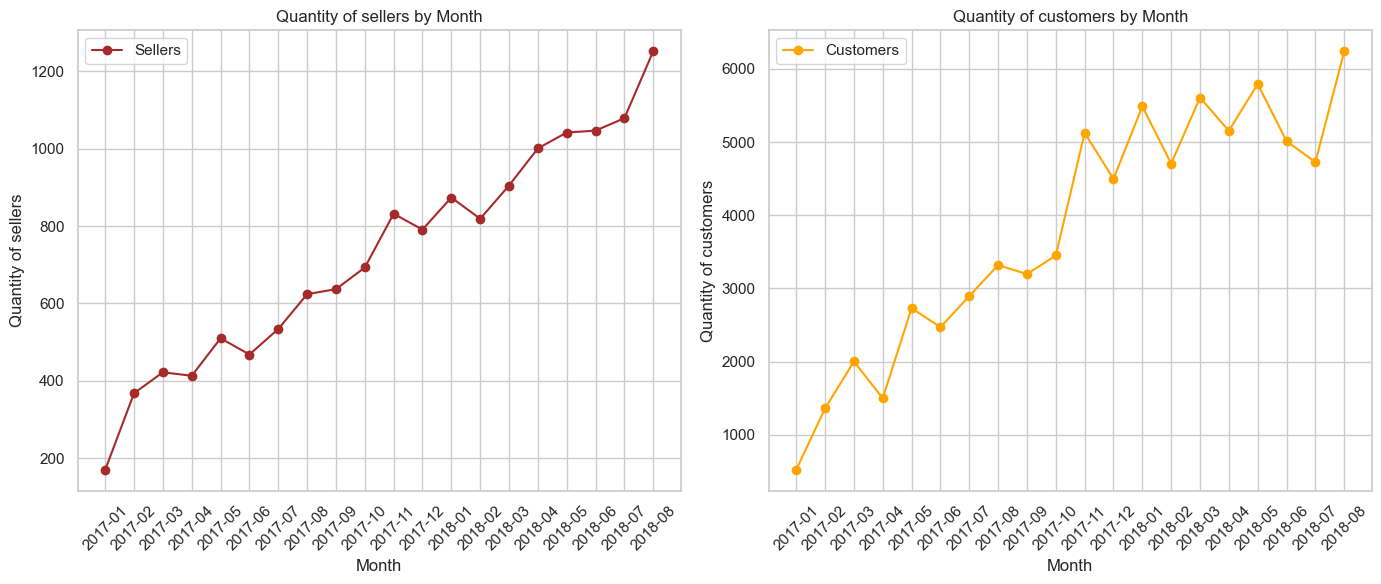

In [137]:


df_group['year_month'] = df_group['year_month'].astype(str)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot quantity of sellers
axes[0].plot(df_group['year_month'], df_group['quantity_sellers'], marker='o', color='brown', label='Sellers')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Quantity of sellers')
axes[0].set_title('Quantity of sellers by Month')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)
axes[0].legend()

# Plot quantity of customers
axes[1].plot(df_group['year_month'], df_group['quantity_customers'], marker='o', color='orange', label='Customers')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Quantity of customers')
axes[1].set_title('Quantity of customers by Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
axes[1].legend()


plt.tight_layout()


plt.show()


We see that quantity of sellers and quantity of customers increased in 6 times.Later I will provide more detail information about our sellers and customers

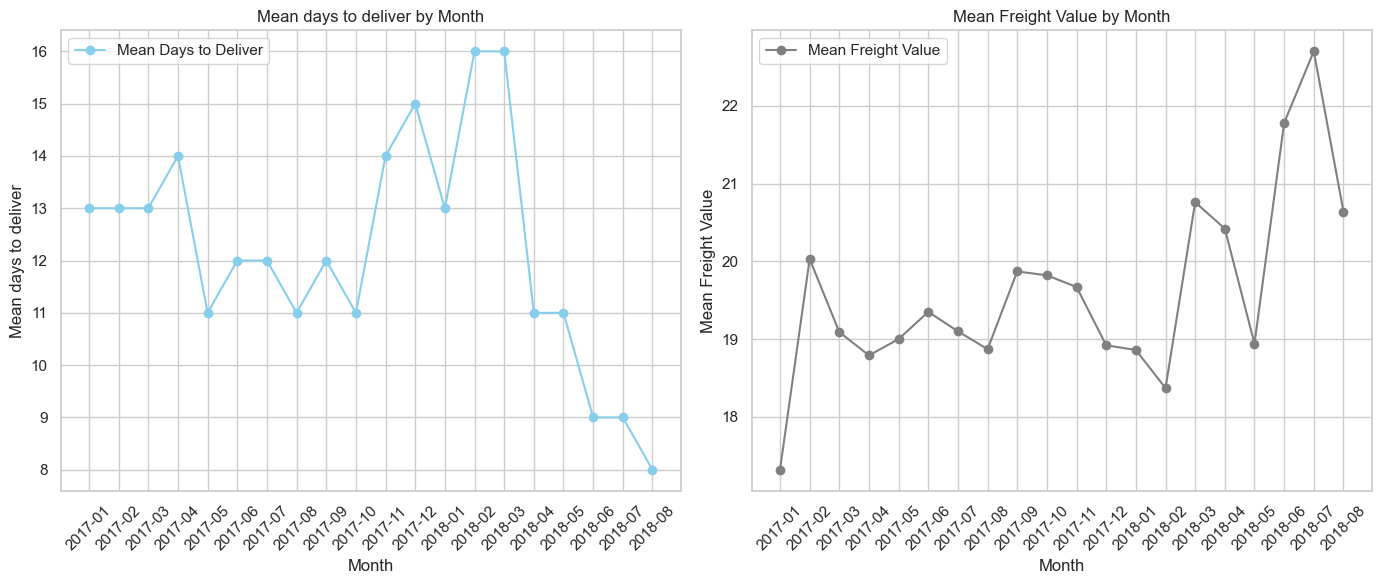

In [138]:

df_group['year_month'] = df_group['year_month'].astype(str)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot mean days to deliver
axes[0].plot(df_group['year_month'], df_group['mean_days_to_deliver'], marker='o', color='skyblue', label='Mean Days to Deliver')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Mean days to deliver')
axes[0].set_title('Mean days to deliver by Month')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)
axes[0].legend()

# Plot mean freight value
axes[1].plot(df_group['year_month'], df_group['mean_freight_value'], marker='o', color='grey', label='Mean Freight Value')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Mean Freight Value')
axes[1].set_title('Mean Freight Value by Month')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()


plt.show()


We see that mean freight value little bit increase from 17 to 20-22$. And mean delivery days also tended to rise before april 2018. I decide to create correlation matrix and understand how mean delivery days involve for satisfaction of  our customers

In [139]:
correlation_matrix = df_group[['mean_days_to_deliver', 'mean_review_score']].corr().round(2)
correlation_matrix

,mean_days_to_deliver,mean_review_score
mean_days_to_deliver,1.00,-0.83
mean_review_score,-0.83,1.00


The correlation coefficient between 'mean_days_to_deliver' and 'mean_review_score' is -0.83, indicating a strong negative correlation between these two variables. This means that as the average number of days to deliver increases, the average review score tends to decrease, and vice versa. In other words, there is a tendency for orders that take longer to deliver to receive lower review scores, and orders that are delivered more quickly tend to receive higher review scores.

### RFM analysis

In [140]:
snapshot_date = df['order_purchase_timestamp'].max() + pd.DateOffset(days=1)

rfm = df.groupby(['seller_id']).agg({'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,
    'order_id': 'count', 'payment_value': 'sum'}).rename(columns={'order_purchase_timestamp': 'Recency','order_id': 'Frequency',
     'payment_value': 'Monetary'}).reset_index()
rfm

<IPython.core.display.Javascript object>

,seller_id,Recency,Frequency,Monetary
0,0015a82c2db000af6aaaf3ae2ecb0532,316,2,1832.04
1,001cca7ae9ae17fb1caed9dfb1094831,48,193,27305.50
2,002100f778ceb8431b7a1020ff7ab48f,140,42,1575.48
3,003554e2dce176b5555353e4f3555ac8,258,1,139.38
4,004c9cd9d87a3c30c522c48c4fc07416,119,134,18370.63
...,...,...,...,...
2829,ffc470761de7d0232558ba5e786e57b7,12,22,1346.41
2830,ffdd9f82b9a447f6f8d4b91554cc7dd3,11,17,2338.11
2831,ffeee66ac5d5a62fe688b9d26f83f534,108,8,1336.91
2832,fffd5413c0700ac820c7069d66d98c89,3,46,9018.19


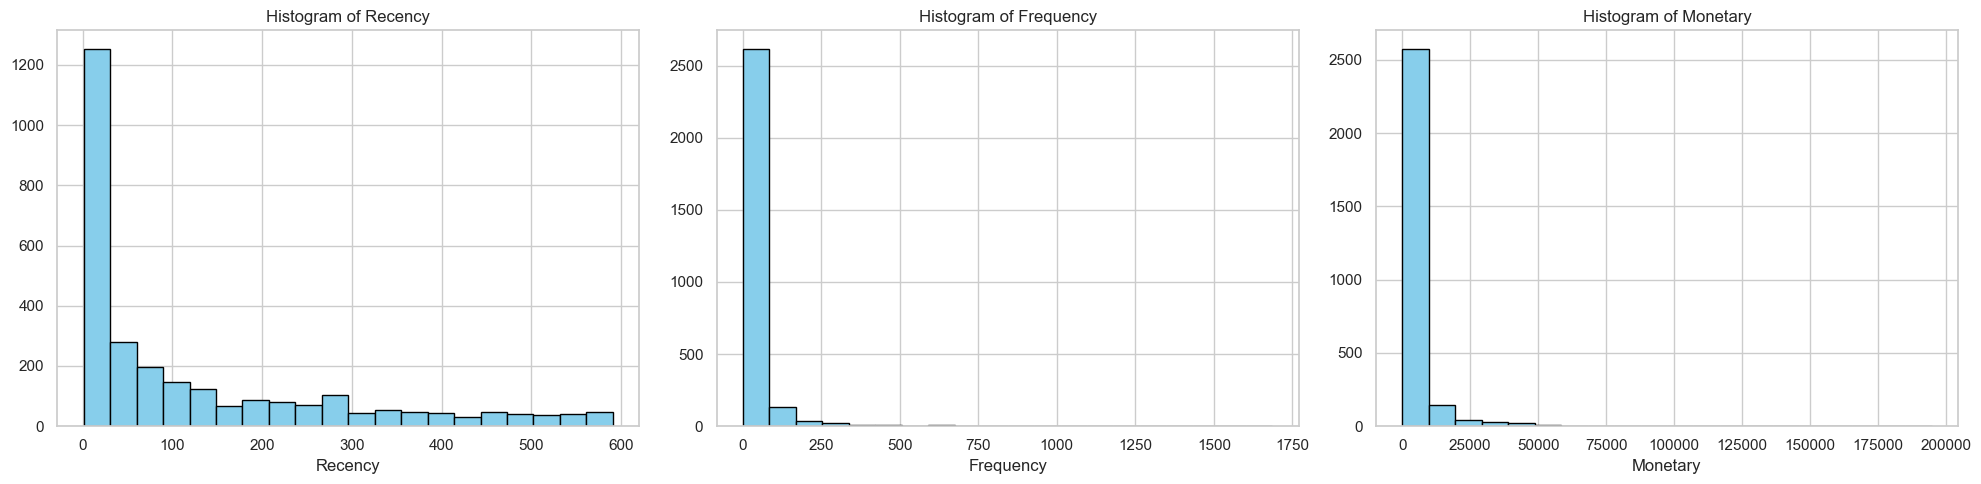

In [141]:
col_list = ['Recency', 'Frequency', 'Monetary']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Iterate through each variable in col_list and create a histogram plot
for i, el in enumerate(col_list):
    axes.flatten()[i].hist(rfm[el], bins=20, color='skyblue', edgecolor='black')
    axes.flatten()[i].set_title(f'Histogram of {el}')
    axes.flatten()[i].set_xlabel(el)


plt.tight_layout()
plt.show()

On  these graphs we see the distribution Recency( How long ago did the sellers make their last sale?), Frequency( How often) and Monetary(how much). We see all distributions with a heavy tails by each metric that I provide segment our sellers by clusters.

### Cluster Analysis

I will use K-means algorithm. It used for clustering data points into groups based on similarities.

In [142]:
X = rfm[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
rfm['cluster'] = kmeans.labels_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [143]:
count_cluster_sellers = rfm['cluster'].value_counts().to_frame().reset_index().\
                        rename(columns= {'index':'cluster','cluster':'count_sellers'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

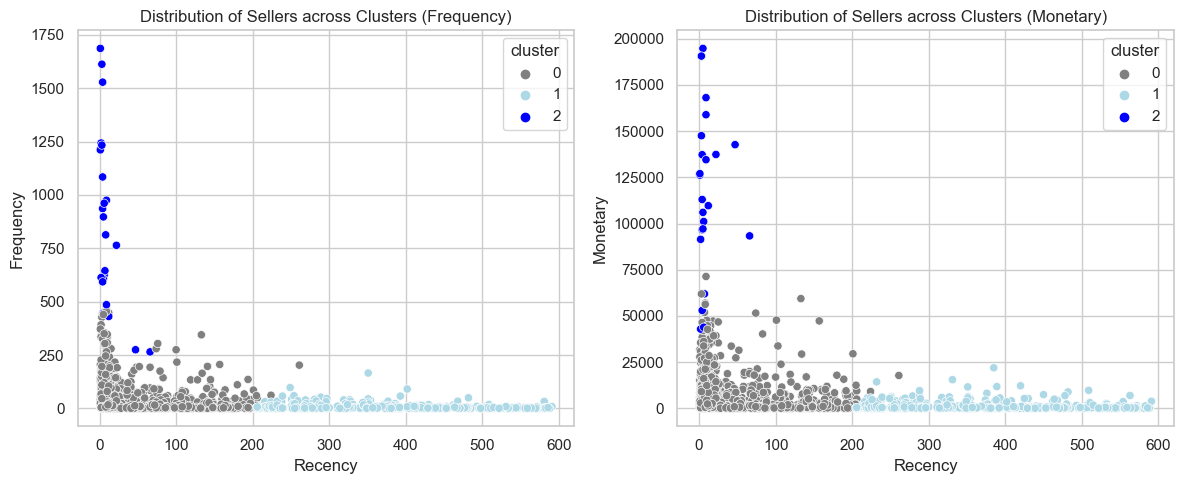

In [144]:



sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


sns.scatterplot(x='Recency', y='Frequency', hue='cluster', data=rfm, palette=['grey', 'lightblue', 'blue'], ax=axes[0])
axes[0].set_xlabel('Recency')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sellers across Clusters (Frequency)')


sns.scatterplot(x='Recency', y='Monetary', hue='cluster', data=rfm, palette=['grey', 'lightblue', 'blue'], ax=axes[1])
axes[1].set_xlabel('Recency')
axes[1].set_ylabel('Monetary')
axes[1].set_title('Distribution of Sellers across Clusters (Monetary)')

plt.tight_layout()
plt.show()


In [145]:
count_cluster_sellers = rfm['cluster'].value_counts().to_frame().reset_index().\
                        rename(columns= {'index':'cluster','cluster':'count_sellers'})

In [146]:
clusters_group = rfm.groupby(['cluster'])['Recency','Frequency','Monetary'].mean().round(2).reset_index()

In [147]:
count_cluster_sellers.merge(clusters_group, how='left', on= 'cluster')

,cluster,count_sellers,Recency,Frequency,Monetary
0,0,2115,47.88,29.87,4137.99
1,1,695,367.35,6.35,1019.61
2,2,24,10.17,842.54,112493.64


We have 3 clusters of our sellers. Cluster O has maximum recency compare with other clusters. I think this group of sellers left our marketplace. Cluster 1 has  the most sellers (more than 2000). The mean Frequency- about 30 orders,the mean Monetary  is more than 4000 $ and mean last sales was about 48 days ago.
Cluster 2 has a smaller number of sellers compared to others (24 sellers), indicating a more focused or specific group of sellers.
I understand that they sell in large volumes to wholesale customers.

Next, I would like to see how the number of products and the number of clients changed by each month for each cluster

In [148]:
final = rfm[['cluster','seller_id']].merge(df, how='inner',on='seller_id')

In [149]:
final_group = final.groupby(['cluster','year_month'])['product_id','customer_unique_id','payment_value'].\
              agg(count_products=('product_id', pd.Series.nunique),\
              count_customers = ('customer_unique_id', pd.Series.nunique),\
              total_payments = ('payment_value','sum')).reset_index()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

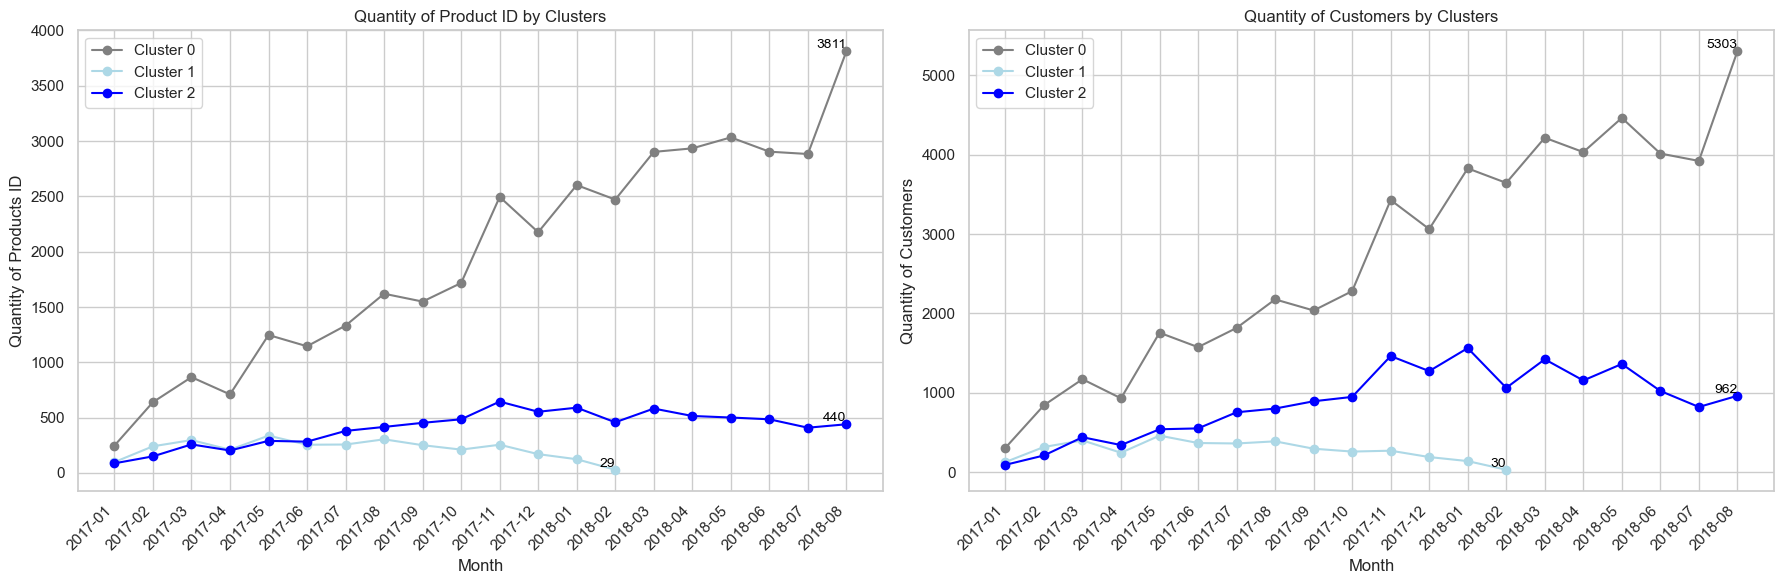

In [150]:
import matplotlib.pyplot as plt

final_group['year_month'] = final_group['year_month'].astype(str)
plt.figure(figsize=(18, 6))


colors =  ['grey', 'lightblue', 'blue']

# First subplot: Quantity of Product ID by Clusters
plt.subplot(1, 2, 1)
for i, (cluster, data) in enumerate(final_group.groupby('cluster')):
    plt.plot(data['year_month'], data['count_products'], label=f'Cluster {cluster}', color=colors[i], marker='o')

plt.title('Quantity of Product ID by Clusters')
plt.xlabel('Month')
plt.ylabel('Quantity of Products ID')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)


for cluster, data in final_group.groupby('cluster'):
    plt.text(data['year_month'].iloc[-1], data['count_products'].iloc[-1], f'{data["count_products"].iloc[-1]}',
             color='black', fontsize=10, ha='right', va='bottom')

# Second subplot: Quantity of Customers by Clusters
plt.subplot(1, 2, 2)
for i, (cluster, data) in enumerate(final_group.groupby('cluster')):
    plt.plot(data['year_month'], data['count_customers'], label=f'Cluster {cluster}', color=colors[i], marker='o')

plt.title('Quantity of Customers by Clusters')
plt.xlabel('Month')
plt.ylabel('Quantity of Customers')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)


for cluster, data in final_group.groupby('cluster'):
    plt.text(data['year_month'].iloc[-1], data['count_customers'].iloc[-1], f'{data["count_customers"].iloc[-1]}',
             color='black', fontsize=10, ha='right', va='bottom')

plt.tight_layout()
plt.show()


In the graphs we see a significant increase in the number of clients and the number of new products for the  cluster 1 from month to month.
Also we see  that number of new products and new customers increased from cluster 2. And  we can confirm that sellers from cluster 0 left our marketplace in March 2018.

Next, I would like to see which product categories bring us the main of our profits. For this I will use Pareto Chart.

### Pareto Chart

In [151]:
products_category = products[['product_id','product_category_name']]

In [152]:
products_category = df[['product_id','seller_id','payment_value']].merge(products_category, how ='left', on=['product_id'])

In [153]:
category_name.rename(columns={'string_field_0': 'product_category_name', 'string_field_1': 'category_name'}, inplace=True)

In [154]:
products_category = products_category.merge(category_name, how='inner', on='product_category_name')

In [156]:
products_category = products_category[['product_id','seller_id','payment_value','product_category_name_english']]

In [160]:
products_category.rename(columns={'product_category_name_english':'category_name'}, inplace= True)

In [162]:
products_name_group = products_category.groupby(['category_name'])['payment_value','seller_id'].\
                      agg(total_payments =('payment_value','sum'),\
                      quantity_of_sellers = ('seller_id',pd.Series.nunique)).\
                      reset_index().sort_values(by = 'total_payments', ascending =False)

<IPython.core.display.Javascript object>

In [165]:
products_name_group['cumulative_percentage'] =  round(products_name_group['total_payments'].cumsum()/\
                                                      products_name_group['total_payments'].sum()*100,2)

In [166]:
quantity_unique_categories = products_name_group['category_name'].nunique()
print(f"Number of unique categories: {quantity_unique_categories}")

Number of unique categories: 71


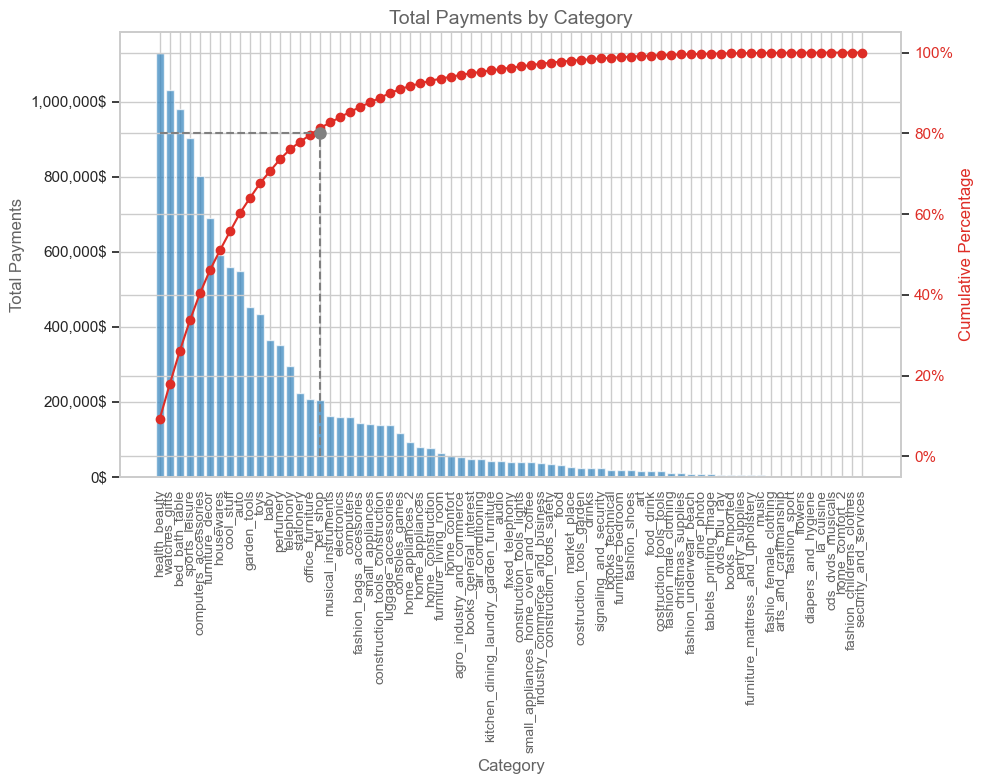

In [167]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(10, 8))


plt.bar(products_name_group['category_name'], products_name_group['total_payments'], color='#3182bd', alpha=0.7)

plt.xlabel('Category', fontsize=12, color='#636363')
plt.ylabel('Total Payments', fontsize=12, color='#636363')
plt.title('Total Payments by Category', fontsize=14, color='#636363')

def format_ticks_dollars(x, pos):
    return '{:,.0f}$'.format(x)


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks_dollars))


plt.xticks(rotation=90, fontsize=10, color='#636363')


ax2 = plt.gca().twinx()
ax2.plot(products_name_group['category_name'], products_name_group['cumulative_percentage'], color='#de2d26', marker='o')
ax2.tick_params(axis='y', labelcolor='#de2d26')


ax2.set_ylabel('Cumulative Percentage', fontsize=12, color='#de2d26')


def format_ticks_percent(x, pos):
    return '{:.0f}%'.format(x)

ax2.yaxis.set_major_formatter(FuncFormatter(format_ticks_percent))

index_80_percent = (products_name_group['cumulative_percentage'] >= 80).idxmax()

plt.plot(products_name_group['category_name'][index_80_percent], 80, marker='o', markersize=8, color='#808080')


intersect_category = products_name_group['category_name'][index_80_percent]
ax2.plot([intersect_category, intersect_category], [0, 80], linestyle='--', color='#808080')


ax2.plot([products_name_group['category_name'].iloc[0], intersect_category], [80, 80], linestyle='--', color='#808080')


plt.tight_layout()
plt.show()


In [168]:
top_categories = products_name_group[products_name_group['cumulative_percentage']<=80]\
                 [['category_name','total_payments','quantity_of_sellers']]

In [169]:
quantity_top_unique_categories = top_categories['category_name'].nunique()
print(f"Number of  top unique categories: {quantity_top_unique_categories}")

Number of  top unique categories: 16


The first 16 categories (out of 71) comprise roughly 80% of total revenue. That is ~20% of all categories. Next I also create a table with revenue and quantity of sellers by each of these categories.

In [170]:
top_categories['total_payments']=top_categories['total_payments'].round(2)

In [171]:
top_categories.style.background_gradient('Blues', subset=['total_payments','quantity_of_sellers']).set_precision(2)

,category_name,total_payments,quantity_of_sellers
43,health_beauty,1128078.37,449
70,watches_gifts,1031642.56,87
7,bed_bath_table,979593.73,181
65,sports_leisure,902476.98,437
15,computers_accessories,800657.31,265
39,furniture_decor,689746.78,314
49,housewares,590662.97,426
20,cool_stuff,558831.70,236
5,auto,547230.32,348
42,garden_tools,452292.37,209


To understand, we are growing due to new clients or due to old clients, I decided to calculate Retention Rate by quarter cohorts.

In [172]:
df_cohort = final[['customer_unique_id','order_purchase_timestamp','year_month','payment_value']]

In [173]:

df_cohort['OrderQuarter'] = df_cohort['order_purchase_timestamp'].dt.to_period('Q')
df_cohort['CohortQuarter'] = df_cohort.groupby('customer_unique_id')['OrderQuarter'].transform('min')


df_cohort['CohortIndex'] = (df_cohort['OrderQuarter'].dt.year - df_cohort['CohortQuarter'].dt.year) * 4 + (df_cohort['OrderQuarter'].dt.quarter - df_cohort['CohortQuarter'].dt.quarter) + 1

cohort_data = df_cohort.groupby(['CohortQuarter', 'CohortIndex']).agg({
    'customer_unique_id': 'nunique',
    'payment_value': 'sum'
}).reset_index()

cohort_data.rename(columns={'customer_unique_id': 'Total_Customers', 'payment_value': 'TotalRevenue'}, inplace=True)




In [174]:
cohort_data['retention_rate'] = round((cohort_data['Total_Customers'] / cohort_data.groupby\
                                  (['CohortQuarter'])['Total_Customers'].transform('max'))*100,2)

In [175]:
cohort_pivot = cohort_data.pivot_table(index='CohortQuarter', columns = 'CohortIndex', values = 'Total_Customers')

<IPython.core.display.Javascript object>

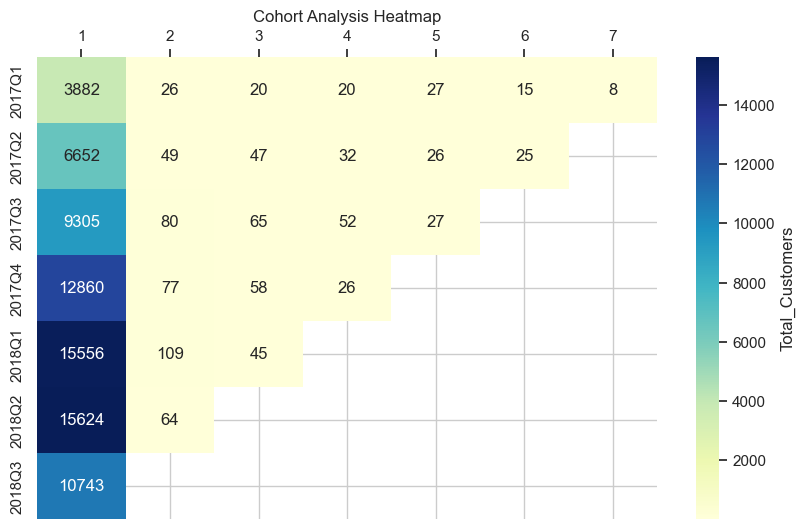

In [176]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(cohort_pivot, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Total_Customers'})

ax.set_ylabel('CohortQuarter')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Cohort Analysis Heatmap')

plt.show()

In [177]:
cohort_pivot_retention = cohort_data.pivot_table(index='CohortQuarter', columns = 'CohortIndex', values = 'retention_rate')

<IPython.core.display.Javascript object>

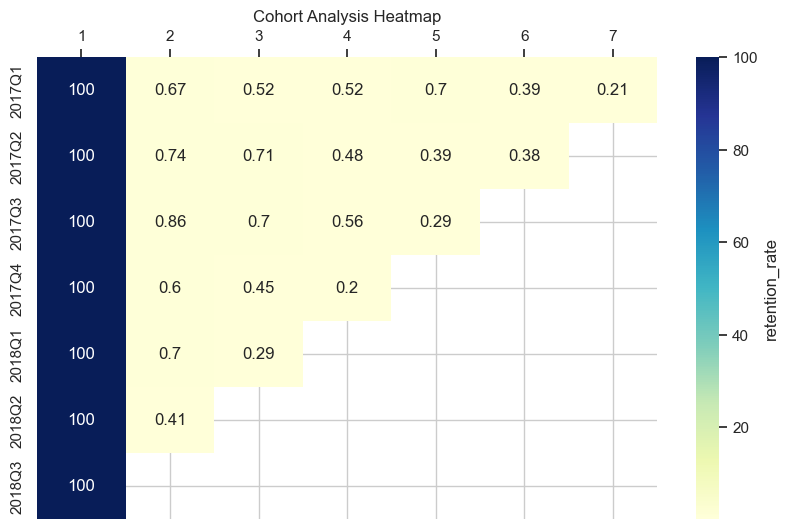

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(cohort_pivot_retention, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'retention_rate'})

ax.set_ylabel('CohortQuarter')

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

ax.set_xlabel('')
ax.set_ylabel('')

plt.title('Cohort Analysis Heatmap')

plt.show()

The analysis shows that less than one percent of users return to make a repeat purchase. Most of the clients made only one purchase.

Conclusion:
We see that  the number of sellers and the number of customers has a stable increase from month to month.
Our sellers mainly make money by attracting new customers. We have a minimum number of repeat sales. First we need to undrstand  why people dont make repeat purchases. Its can be:
- Product Longevity: Customers may not need to replace these items frequently due to their durability.
- No Loyalty Incentives: Without loyalty programs, discounts for returning customers, or rewards for frequent purchases, customers may not feel incentivized to make repeat purchases.
- Unsatisfactory Product Quality
- Price Sensitivity: If competitors offer similar products at lower prices

My recommendations:
- Increase retention through  providing loyalty programs, сreating personalized product recommendations, provide price monitoring offline markets or another marketplace, provide selection of sellers with quality products, add fast-moving products
- We also know which categories bring us the main profits, we can focus on attracting sellers in these categories.
- We need to understand the reason why some sellers left the marketplace
- And don’t forget to control the average number of delivery days. Because this indicator significantly affects the satisfaction of our customers.